In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train=pd.read_csv('drive/My Drive/Colab Notebooks/train.tsv',sep='\t')
#test=pd.read_csv('test.tsv',sep='\t')

In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
train.shape

(1482535, 8)

In [0]:
test.shape

(693359, 7)

In [0]:
c=0
for i in train['train_id']:
    if i==i+1:
        c=c+1
    if(c!=0):
        print(i,c)
        

In [7]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [8]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [9]:
train.isna().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [10]:
print("Number of missing values in category name: ",train['category_name'].isna().sum())
print("Number of missing values in brand name: ",train['brand_name'].isna().sum())
print("Number of missing values in item description: ",train['item_description'].isna().sum())


Number of missing values in category name:  6327
Number of missing values in brand name:  632682
Number of missing values in item description:  4


In [11]:
print("Percentage of Missing values")
print("category_name:",train['category_name'].isna().sum()*100/len(train['category_name']))
print("brand_name:",train['brand_name'].isna().sum()*100/len(train['brand_name']))
print("item_description:",train['item_description'].isna().sum()*100/len(train['item_description']))

Percentage of Missing values
category_name: 0.42676901388500105
brand_name: 42.67568725190299
item_description: 0.00026980813269163965


### PRICE

In [12]:
train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

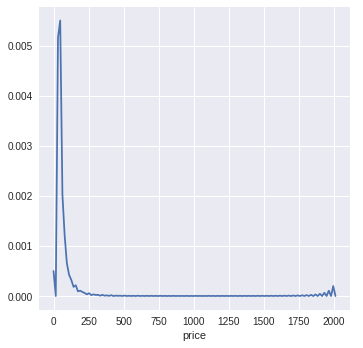

In [13]:
sns.FacetGrid(train, size=5) \
   .map(sns.distplot, "price",hist=False) \
   .add_legend()
plt.show()

Text(0.5, 1.0, 'Price Distribution - Training Set')

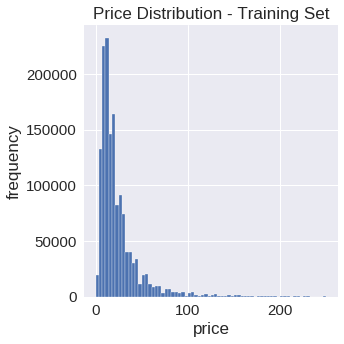

In [14]:
plt.subplot(1, 2, 1)
(train['price']).plot.hist(bins=70,figsize=(10,5), edgecolor='white',range=[0,250])
plt.xlabel('price', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)

### BRAND NAME

In [15]:
len(train['brand_name'].unique())

4810

In [16]:
train.brand_name.describe()

count     849853
unique      4809
top         PINK
freq       54088
Name: brand_name, dtype: object

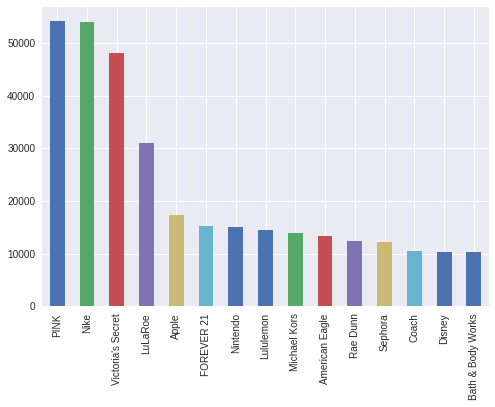

In [17]:
a=train['brand_name'].value_counts()[:15]
a.plot(kind="bar")

In [0]:
train.brand_name=train.brand_name.fillna('missing')

In [19]:
train['brand_name'].value_counts()[:5]

missing              632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64

In [20]:
brand_names=train.brand_name.unique()
brandexpense=list()
for name in brand_names:
    if len(train[train['brand_name']==name] )>=50:
                       brandexpense.append([name,train.price[train['brand_name']==name].median()])
    
brandexpense.sort(key=lambda x: x[1],reverse=True)
brandexpense[:10]

[['David Yurman', 220.0],
 ['Balenciaga', 176.0],
 ['Christian Louboutin', 156.0],
 ['Tieks', 156.0],
 ['Sherri Hill', 151.0],
 ['Celine', 149.0],
 ['Jovani', 139.0],
 ['MICHELE', 134.0],
 ['Go Gear', 132.5],
 ['MCM Worldwide', 129.0]]

In [21]:
train['shipping'].value_counts()


0    819435
1    663100
Name: shipping, dtype: int64

In [22]:

print("If shipping =1, then , delivery charges are borne by the buyer")
print("If shipping =0 , then ,delivery charges are borne by the seller")
print("Percentage of shipping =1 : ", 663100*100/train.shape[0])
print("Percentage of shipping =0 : ",819435*100/train.shape[0])

If shipping =1, then , delivery charges are borne by the buyer
If shipping =0 , then ,delivery charges are borne by the seller
Percentage of shipping =1 :  44.727443196956564
Percentage of shipping =0 :  55.272556803043436


In [0]:
print('Mean price of items for which shipping fees is borne by seller is ',train.price[train['shipping']==0].mean())
print('Mean price of items for which shipping fees is borne by buyer is ',train.price[train['shipping']==1].mean())

Mean price of items for which shipping fees is borne by seller is  30.111777627267568
Mean price of items for which shipping fees is borne by buyer is  22.56772583320766


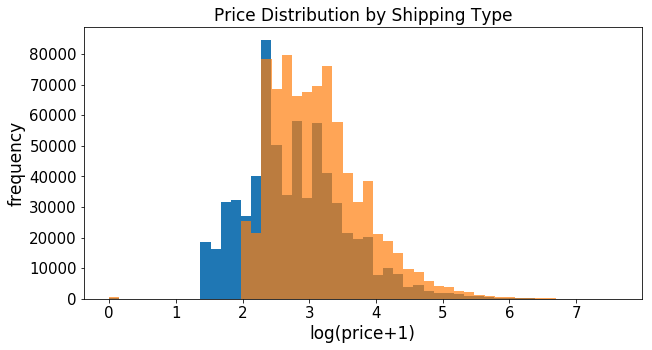

In [0]:
sel= train.loc[train.shipping==1, 'price']
buy= train.loc[train.shipping==0, 'price']
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(np.log(sel+1), alpha=1.0, bins=50,
       label='Price when Seller bears Shipping Fee')
ax.hist(np.log(buy+1), alpha=0.7, bins=50,
       label='Price when Buyer bears Shipping fee')
ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
plt.xlabel('log(price+1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.title('Price Distribution by Shipping Type', fontsize=17)
plt.tick_params(labelsize=15)
plt.show()


In [0]:
train.item_condition_id.describe()

count    1.482535e+06
mean     1.907380e+00
std      9.031586e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      5.000000e+00
Name: item_condition_id, dtype: float64

In [0]:
item_id=train['item_condition_id'].value_counts()

In [0]:
train['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

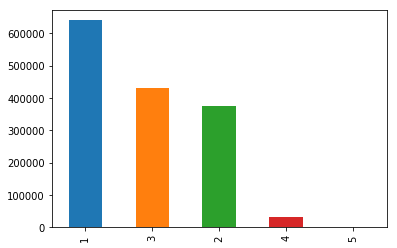

In [0]:
item_id.plot(kind='bar')

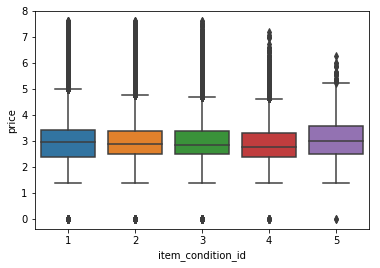

In [0]:
sns.boxplot(x='item_condition_id',y=np.log(train.price+1), data=train)
plt.show()

In [0]:
len(train.category_name.unique())

1288

In [0]:
train.category_name.isna().sum()

6327

In [0]:
print("Percentage of Missing values: ",6327*100/train.shape[0])

Percentage of Missing values:  0.42676901388500105


In [0]:
train.category_name.describe()

count                                            1476208
unique                                              1287
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               60177
Name: category_name, dtype: object

In [0]:
train.category_name.value_counts()[:20]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                                  19103
Women/Shoes/Boots                 

In [0]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan



In [0]:
train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

In [0]:
maincat = [x for x in train['category_main'].unique() if type(x)==str]
catsum=0
for x in maincat:
    catsum+=100*len(train[train['category_main']==x])/len(train)
    print('{:25}{:3f}% of training data'.format(x, 100*len(train[train['category_main']==x])/len(train)))
print('nan {:3f}% of training data'.format(100-catsum))

Men                      6.297524% of training data
Electronics              8.069354% of training data
Women                    44.814119% of training data
Home                     4.578037% of training data
Sports & Outdoors        1.641175% of training data
Vintage & Collectibles   3.138543% of training data
Beauty                   14.018421% of training data
Other                    3.059017% of training data
Kids                     11.580772% of training data
Handmade                 2.080221% of training data
nan 0.722816% of training data


In [0]:
category_names=train.category_main.unique()
expensive_cat=list()
category_names

array(['Men', 'Electronics', 'Women', 'Home', 'Sports & Outdoors',
       'Vintage & Collectibles', 'Beauty', 'Other', 'Kids', nan,
       'Handmade'], dtype=object)

In [0]:
train.category_main.isna().sum()
train.category_sub1.isna().sum()
train.category_sub2.isna().sum()


10716

In [0]:
print("Percentage of missing values: ",10716*100/len(train.category_name))

Percentage of missing values:  0.7228159874809026


In [0]:
for name in category_names:
    if len(train[train['category_main']==name] )>=10:
                       expensive_cat.append([name,train.price[train['category_main']==name].median()])


In [0]:
expensive_cat.sort(key=lambda x: x[1],reverse=True)

In [0]:
expensive_cat

[['Men', 21.0],
 ['Women', 19.0],
 ['Home', 18.0],
 ['Sports & Outdoors', 16.0],
 ['Vintage & Collectibles', 16.0],
 ['Electronics', 15.0],
 ['Beauty', 15.0],
 ['Other', 14.0],
 ['Kids', 14.0],
 ['Handmade', 12.0]]

No handles with labels found to put in legend.


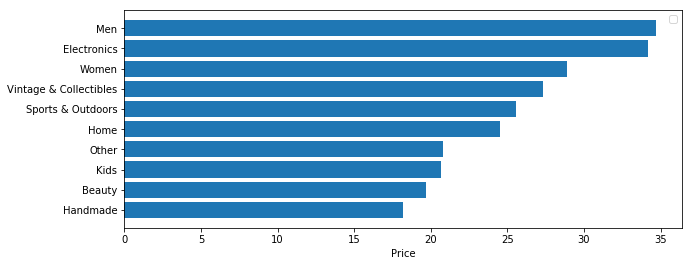

In [0]:
df1 = train.groupby(['category_main'])['price'].agg(['size','sum'])
df1['mean_price']=df1['sum']/df1['size']
df1.sort_values(by=['mean_price'], ascending=False, inplace=True)
df1 = df1[:10]
df1.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(10, 4))
plt.barh(range(0,len(df1)), df1['mean_price'])
plt.yticks(range(0,len(df1)), df1.index, fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('Price', fontsize=10)

plt.legend(fontsize=10)
plt.show()

In [0]:
train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'category_main',
       'category_sub1', 'category_sub2'],
      dtype='object')

In [0]:
train.category_sub1.describe()

count              1471819
unique                 113
top       Athletic Apparel
freq                134383
Name: category_sub1, dtype: object

No handles with labels found to put in legend.


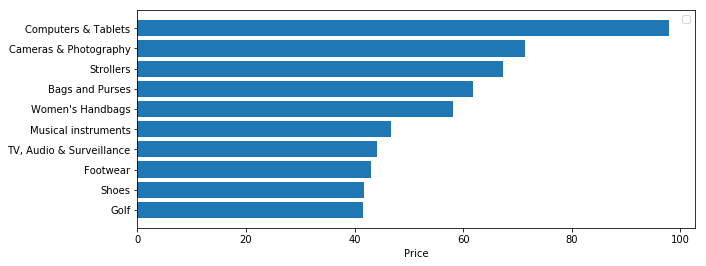

In [0]:
df = train.groupby(['category_sub1'])['price'].agg(['size','sum'])
df['mean_price']=df['sum']/df['size']
df.sort_values(by=['mean_price'], ascending=False, inplace=True)
df = df[:10]
df.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(10, 4))
plt.barh(range(0,len(df)), df['mean_price'])
plt.yticks(range(0,len(df)), df.index, fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('Price', fontsize=10)

plt.legend(fontsize=10)
plt.show()

In [0]:
train.category_sub2.describe()

count                     1471819
unique                        864
top       Pants, Tights, Leggings
freq                        60177
Name: category_sub2, dtype: object

No handles with labels found to put in legend.


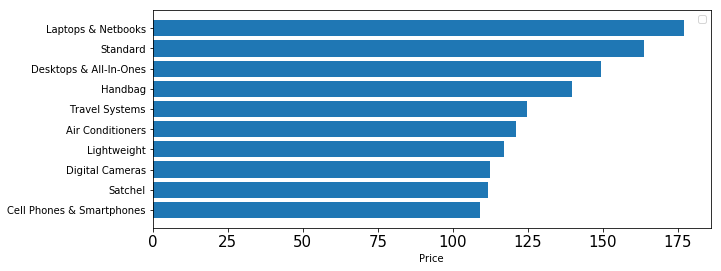

In [0]:
df2 = train.groupby(['category_sub2'])['price'].agg(['size','sum'])
df2['mean_price']=df2['sum']/df2['size']
df2.sort_values(by=['mean_price'], ascending=False, inplace=True)
df2 = df2[:10]
df2.sort_values(by=['mean_price'], ascending=True, inplace=True)

plt.figure(figsize=(10, 4))
plt.barh(range(0,len(df2)), df2['mean_price'])
plt.yticks(range(0,len(df2)), df2.index, fontsize=10)
plt.xticks(fontsize=15)

plt.xlabel('Price', fontsize=10)

plt.legend(fontsize=10)
plt.show()

In [0]:
train.name.describe()

count     1482535
unique    1225273
top        Bundle
freq         2232
Name: name, dtype: object

In [0]:
print("Number of duplicate values: ",len(train.name)-len(train.name.unique()))

Number of duplicate values:  257262


In [0]:
print("Percentage of duplicate values: ",257262*100/len(train.name))

Percentage of duplicate values:  17.35284495812915


In [0]:
train.name.value_counts()[:10]

Bundle                 2232
Reserved                453
Converse                445
BUNDLE                  418
Dress                   410
Coach purse             404
Lularoe TC leggings     396
Romper                  353
Nike                    340
Vans                    334
Name: name, dtype: int64

In [0]:
train.name=train.name.str.lower()

In [0]:
train.name.value_counts()[:10]

Bundle                 2232
Reserved                453
Converse                445
BUNDLE                  418
Dress                   410
Coach purse             404
Lularoe TC leggings     396
Romper                  353
Nike                    340
Vans                    334
Name: name, dtype: int64

In [0]:
m=[]
k=[]
for i in train['name']:
    m=i.split()
    k.append(len(m))
    m=[]


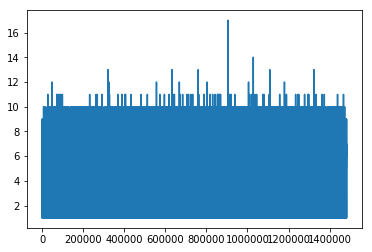

In [0]:
plt.plot(k)

In [0]:
print(max(k))
print(min(k))
print(k.index(1))

17
1
98


In [0]:
print(train.iloc[[98]])

    train_id   name  item_condition_id                  category_name  \
98        98  gucci                  3  Men/Men's Accessories/Watches   

   brand_name  price  shipping  \
98    missing   49.0         0   

                                     item_description category_main  \
98  Rose gold bezel and crown Engraved logo Red an...           Men   

        category_sub1 category_sub2  
98  Men's Accessories       Watches  


In [0]:
train['item_description'].describe()

count                1482531
unique               1281426
top       No description yet
freq                   82489
Name: item_description, dtype: object

In [0]:
train['item_description'] = train['item_description'].str.lower()

In [0]:
train[train.item_description.isna()]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
511535,511535,Shoes for Michelle,4,Kids/Girls 0-24 Mos/Shoes,NaN,9.0,0,NaN
861230,861230,Lipgloss,4,Beauty/Makeup/Lips,NaN,49.0,0,NaN
1224924,1224924,Disney Minnie Head band,3,Women/Women's Accessories/Hair Accessories,Disney,9.0,0,NaN
1264242,1264242,For Bianca,3,Women/Women's Accessories/Scarves & Wraps,NaN,10.0,1,NaN


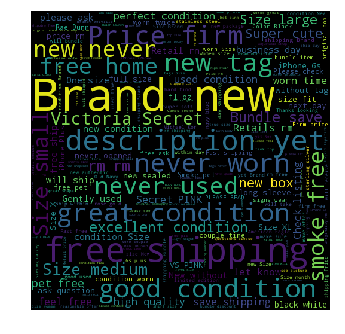

In [0]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 500, height = 500).generate(" ".join(train.item_description.astype(str)))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

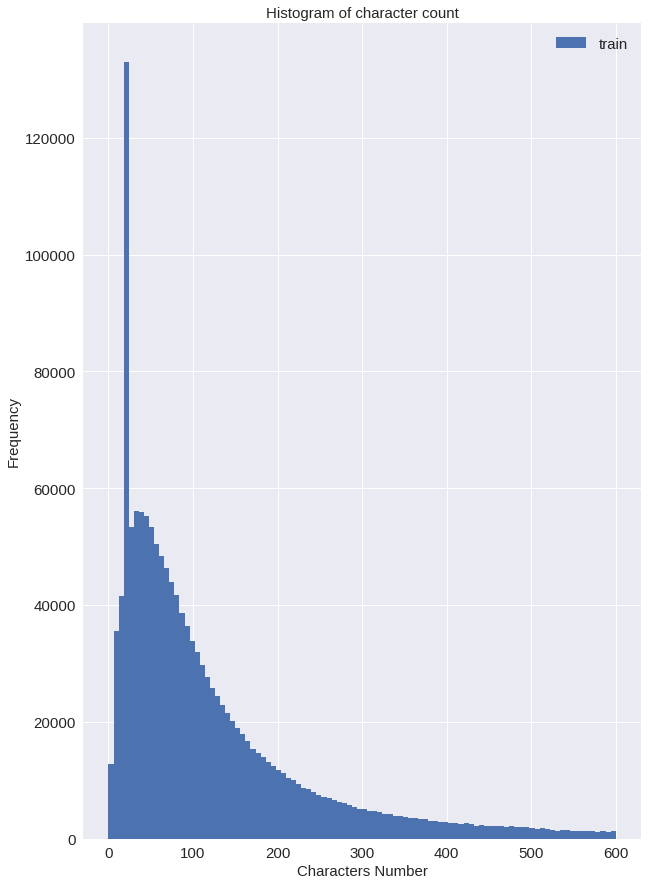

In [28]:
train_ds = pd.Series(train['item_description'].tolist()).astype(str)


bins=100
plt.figure(figsize=(10, 15))
plt.hist(train_ds.apply(len), bins, range=[0,600], label='train')

plt.title('Histogram of character count', fontsize=15)
plt.xlabel('Characters Number', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()


In [0]:
train['has_description'] = 1
train.loc[train['item_description']=='No description yet', 'has_description'] = 0


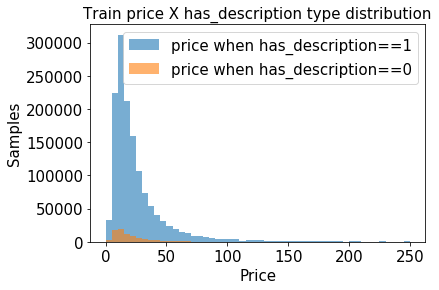

In [0]:

bins=50
plt.hist(train[train['has_description']==1]['price'], bins, range=[0,250],
         alpha=0.6, label='price when has_description==1')
plt.hist(train[train['has_description']==0]['price'], bins, range=[0,250],
         alpha=0.6, label='price when has_description==0')
plt.title('Train price X has_description type distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()


No handles with labels found to put in legend.


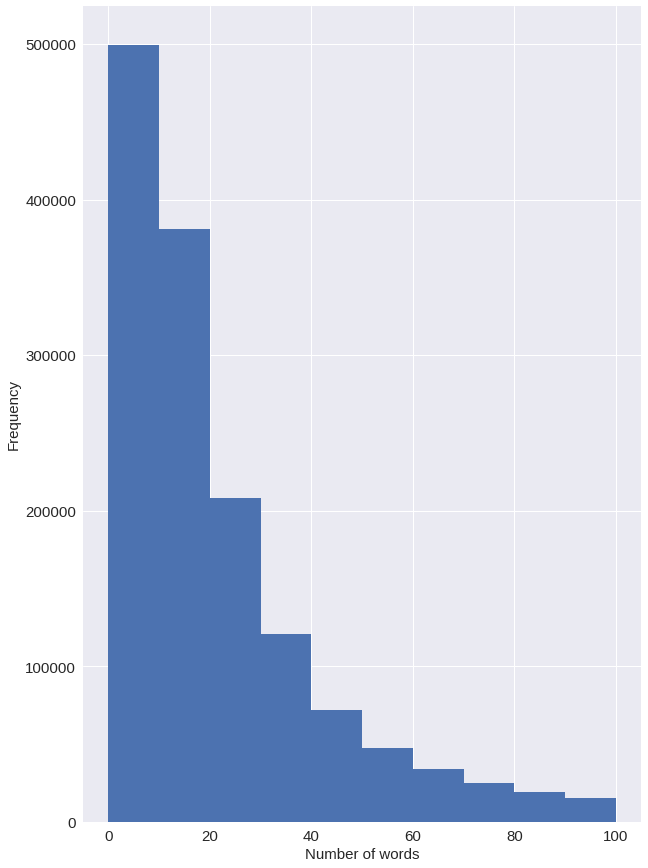

In [29]:
bins=10
plt.figure(figsize=(10, 15))
plt.hist(train_ds.apply(lambda x: len(x.split())), bins, range=[0,100])

plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()
